# Symbolic representation

## Example of WordNet

In [1]:
import nltk
# download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from textblob import Word
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from numpy.linalg import norm

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Renan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Renan\AppData\Roaming\nltk_data...


In [2]:
# definition of word
for l in wordnet.synsets('cat'):
  print(l.name(), ' : ' ,wordnet.synset(l.name()).definition())

cat.n.01  :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
guy.n.01  :  an informal term for a youth or man
cat.n.03  :  a spiteful woman gossip
kat.n.01  :  the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
cat-o'-nine-tails.n.01  :  a whip with nine knotted cords
caterpillar.n.02  :  a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
big_cat.n.01  :  any of several large cats typically able to roar and living in the wild
computerized_tomography.n.01  :  a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis
cat.v.01  :  beat with a cat-o'-nine-tails
vomit.v.01  :  eject the contents of the stomach through the mouth


In [17]:
# hyper and pyponym
print("parent of word :", wordnet.synset('cat.n.01').hypernyms())
print("children of word :", wordnet.synset('cat.n.01').hyponyms())

parent of word : [Synset('feline.n.01')]
children of word : [Synset('domestic_cat.n.01'), Synset('wildcat.n.03')]


Synset('feline.n.01')
Synset('domestic_cat.n.01')
Synset('wildcat.n.03')


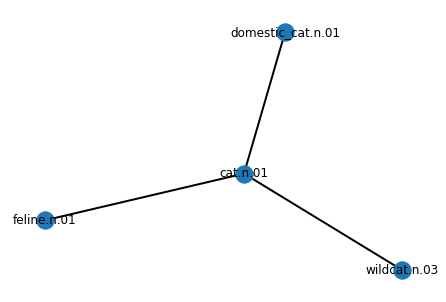

In [18]:
# visualization
G=nx.Graph()
word = Word("cat")
w=word.synsets[0]

G.add_node(w.name())
for h in w.hypernyms():
      print (h)
      G.add_node(h.name())
      G.add_edge(w.name(),h.name())
  
for h in w.hyponyms():
      print (h)
      G.add_node(h.name())
      G.add_edge(w.name(),h.name())

# print (G.nodes(data=True))
plt.show()
nx.draw(G, width=2, with_labels=True)

In [23]:
## synonym and antonym
word_use = 'run'
#Creating a list 
synonyms = []
antonyms = []
for syn in wordnet.synsets(word_use):
    for lm in syn.lemmas():
             synonyms.append(lm.name())#adding into synonyms
print('synonyms of {} = '.format(word_use),set(synonyms))


for ant in wordnet.synsets(word_use):
    for lm in ant.lemmas():
        if lm.antonyms():
            antonyms.append(lm.antonyms()[0].name()) #adding into antonyms
print('antonyms of {} = '.format(word_use),set(antonyms))

synonyms of run =  {'hunt', 'ply', 'die_hard', 'lam', 'bunk', 'flow', 'rivulet', 'running', 'rill', 'tend', 'trial', 'streamlet', 'endure', 'execute', 'runnel', 'escape', 'carry', 'extend', 'take_to_the_woods', 'hunt_down', 'pass', 'run_away', 'tally', 'guide', 'unravel', 'feed', 'be_given', 'race', 'break_away', 'course', 'scat', 'black_market', 'turn_tail', 'lean', 'bleed', 'track_down', 'discharge', 'operate', 'footrace', 'go', 'run_for', 'play', 'head_for_the_hills', 'scarper', 'range', 'function', 'incline', 'consort', 'melt', 'draw', 'prevail', 'hightail_it', 'ladder', 'running_game', 'fly_the_coop', 'test', 'running_play', 'run', 'outpouring', 'streak', 'campaign', 'lead', 'work', 'persist', 'ravel', 'political_campaign', 'foot_race', 'melt_down', 'move'}
antonyms of run =  {'malfunction', 'idle'}


In [29]:
## Wu-palmer similarity 
# compare similarity #1
  # make sense if they are close together
dcat  = wordnet.synset('domestic_cat.n.01')
wcat  = wordnet.synset('wildcat.n.03')
lemon = wordnet.synset('lemon.n.01')
print('Similarity between domestic cat and wildcat : ' , dcat.wup_similarity(wcat))
print('Similarity between domestic cat and lemon : ' , dcat.wup_similarity(lemon))
print('Similarity between wildcat and cook : ' , wcat.wup_similarity(lemon))

Similarity between domestic cat and wildcat :  0.9333333333333333
Similarity between domestic cat and lemon :  0.38095238095238093
Similarity between wildcat and cook :  0.2962962962962963


In [32]:
# compare similarity #2
  # doesn't make sense if they are far, even they are similar
x1 = wordnet.synset('increase.n.01')
x2 = wordnet.synset('increment.n.01')
print('Similarity between increase and increment : ' , x1.wup_similarity(x2))
print("It doesn't make sense")

Similarity between increase and increment :  0.2222222222222222
It doesn't make sense


## Example of one-hot encoding

In [33]:
# create vocabulary
vocab = pd.Series(['domestic_cat','wildcat','lemon'])
print(vocab)

0    domestic_cat
1         wildcat
2           lemon
dtype: object


In [34]:
metric = pd.get_dummies(vocab).astype(int).T
print(metric)

              0  1  2
domestic_cat  1  0  0
lemon         0  0  1
wildcat       0  1  0


In [35]:
dcat = metric.loc['domestic_cat',:].values
wcat = metric.loc['wildcat',:].values
lemon = metric.loc['lemon',:].values

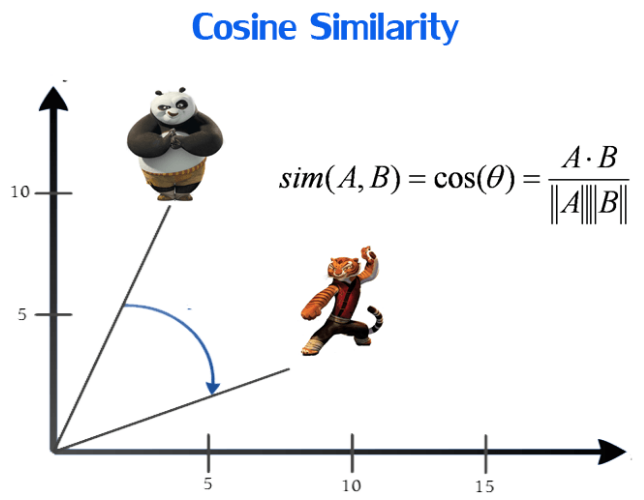

In [43]:
# compute cosine similarity
dcat_wcat_cosine = np.dot(dcat,wcat)/(norm(dcat)*norm(wcat))
print("Cosine Similarity between domestic cat and wildcat:", dcat_wcat_cosine)

dcat_lem_cosine = np.dot(dcat,lemon)/(norm(dcat)*norm(lemon))
print("Cosine Similarity between domestic cat and lemon:", dcat_lem_cosine)

wcat_lem_cosine = np.dot(wcat,lemon)/(norm(wcat)*norm(lemon))
print("Cosine Similarity between wildcat and lemon:", wcat_lem_cosine)
print('')
print("Similarity can not be computed correctly by one-hot encoding")

Cosine Similarity between domestic cat and wildcat: 0.0
Cosine Similarity between domestic cat and lemon: 0.0
Cosine Similarity between wildcat and lemon: 0.0

Similarity can not be computed correctly by one-hot encoding


# Sparse representation

## Term-Document matrix

In [44]:
# download corpus of documents
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Renan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [45]:
files = nltk.corpus.gutenberg.fileids()
print(files)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [46]:
# dowload sample documents
caesar = gutenberg.raw('shakespeare-caesar.txt')
hamlet = gutenberg.raw('shakespeare-hamlet.txt')
leaves = gutenberg.raw('melville-moby_dick.txt')

In [47]:
data_termdoc = pd.DataFrame([[caesar],[hamlet],[leaves]], columns = ['text'])
data_termdoc['type'] = pd.Series(['caesar','hamlet','moby_dick'])
data_termdoc

,text,type
0,[The Tragedie of Julius Caesar by William Shak...,caesar
1,[The Tragedie of Hamlet by William Shakespeare...,hamlet
2,[Moby Dick by Herman Melville 1851]\r\n\r\n\r\...,moby_dick


In [48]:
# Count Vectorizer
vect = CountVectorizer(token_pattern="[^\W\d_]+")
vects = vect.fit_transform(data_termdoc.text)

In [49]:
# create term-document matrix
td = pd.DataFrame(vects.todense())
td.columns = vect.get_feature_names_out()

term_document_matrix = td.T
term_document_matrix.columns = [i for i in data_termdoc['type']]

In [51]:
term_document_matrix

,caesar,hamlet,moby_dick
a,267,511,4736
aback,0,0,2
abaft,0,0,2
abandon,0,0,3
abandoned,0,0,7
...,...,...,...
zone,0,1,5
zoned,0,0,2
zones,0,0,3
zoology,0,0,2


In [53]:
# Print the first 10 rows
term_document_matrix['total_count'] = term_document_matrix.sum(axis = 1)
term_document_matrix = term_document_matrix.sort_values(by = 'total_count', ascending = False)
print(term_document_matrix.drop(columns = ['total_count']).head(10))

      caesar  hamlet  moby_dick
the      579     993      14431
and      627     863       6430
of       354     610       6609
to       446     685       4625
a        267     511       4736
in       225     400       4172
that     289     377       3085
i        533     574       2127
it       198     419       2522
his      157     285       2530


In [54]:
# create document represetnation
caesar = term_document_matrix['caesar'].values
hamlet = term_document_matrix['hamlet'].values
moby_dick = term_document_matrix['moby_dick'].values

In [56]:
# compute cosine similarity
x1 = np.dot(caesar,hamlet)/(norm(caesar)*norm(hamlet))
print("Cosine Similarity between caesar and hamlet:", x1)
x2 = np.dot(caesar,moby_dick)/(norm(caesar)*norm(moby_dick))
print("Cosine Similarity between caesar and moby_dick:", x2)
x3 = np.dot(hamlet,moby_dick)/(norm(hamlet)*norm(moby_dick))
print("Cosine Similarity between hamlet and moby_dick:", x3)

Cosine Similarity between caesar and hamlet: 0.9294852371467272
Cosine Similarity between caesar and moby_dick: 0.7850428119783942
Cosine Similarity between hamlet and moby_dick: 0.8416829903062351


In [57]:
# how does word embedding look like?
i = 'whale'
print('word representation of {} : '.format(i), term_document_matrix[['caesar','hamlet','moby_dick']].loc[[i]].values)
print('document matrix of moby_dick size of:', len(moby_dick))
moby_dick

word representation of whale :  [[   0    2 1226]]
document matrix of moby_dick size of: 20412


array([14431,  6430,  6609, ...,     1,     1,     1], dtype=int64)

## Word co-occurrence

In [58]:
from collections import defaultdict

In [59]:
def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

In [66]:
sentences = ["The fast cat wears no hat", 
             "The cat in the black hat run fast",
             "The black hat is worn on the fast run cat",
             "The cat run fast when wore the black hat"]

df = co_occurrence(sentences, 2) 
df

,black,cat,fast,hat,in,is,no,on,run,the,wears,when,wore,worn
black,0,0,0,3,1,1,0,0,1,3,0,0,1,0
cat,0,0,3,0,1,0,1,0,2,4,1,0,0,0
fast,0,3,0,1,0,0,0,1,3,2,1,1,1,0
hat,3,0,1,0,0,1,1,0,1,3,1,0,0,1
in,1,1,0,0,0,0,0,0,0,2,0,0,0,0
is,1,0,0,1,0,0,0,1,0,0,0,0,0,1
no,0,1,0,1,0,0,0,0,0,0,1,0,0,0
on,0,0,1,0,0,1,0,0,0,1,0,0,0,1
run,1,2,3,1,0,0,0,0,0,2,0,1,0,0
the,3,4,2,3,2,0,0,1,2,0,0,1,1,1


## TF-IDF

In [68]:
# download corpus of documents
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Renan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [69]:
# dowload sample documents
caesar = gutenberg.raw('shakespeare-caesar.txt')
hamlet = gutenberg.raw('shakespeare-hamlet.txt')
leaves = gutenberg.raw('melville-moby_dick.txt')

In [70]:
# Count Vectorizer
vect = TfidfVectorizer()  
vects = vect.fit_transform(data_termdoc.text)

In [71]:
# create term-document matrix
td = pd.DataFrame(vects.todense())
td.columns = vect.get_feature_names_out()

term_document_matrix = td.T
term_document_matrix.columns = [i for i in data_termdoc['type']]

In [72]:
# Print the first 10 rows
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)
print(term_document_matrix.drop(columns=['total_count']).head(10))

        caesar    hamlet  moby_dick
the   0.362201  0.421295   0.699773
and   0.392228  0.366140   0.311797
of    0.221449  0.258801   0.320477
to    0.279001  0.290621   0.224271
in    0.140752  0.169706   0.202304
you   0.244595  0.223587   0.043351
that  0.180788  0.159948   0.149595
it    0.123862  0.177767   0.122294
is    0.158268  0.139159   0.083647
my    0.130743  0.212981   0.028561


In [73]:
# create document represetnation
caesar = term_document_matrix['caesar'].values
hamlet = term_document_matrix['hamlet'].values
moby_dick = term_document_matrix['moby_dick'].values

In [74]:
# compute cosine similarity
x1 = np.dot(caesar,hamlet)/(norm(caesar)*norm(hamlet))
print("Cosine Similarity between caesar and hamlet:", x1)
x2 = np.dot(caesar,moby_dick)/(norm(caesar)*norm(moby_dick))
print("Cosine Similarity between caesar and moby_dick:", x2)
x3 = np.dot(hamlet,moby_dick)/(norm(hamlet)*norm(moby_dick))
print("Cosine Similarity between hamlet and moby_dick:", x3)

Cosine Similarity between caesar and hamlet: 0.8884863499054041
Cosine Similarity between caesar and moby_dick: 0.7650553779904834
Cosine Similarity between hamlet and moby_dick: 0.8158917741877356


In [80]:
# how does wor embedding look like?
i = 'whale'
print('word representation of {} : '.format(i), term_document_matrix[['caesar','hamlet','moby_dick']].loc[[i]].values)
print('document matrix of moby_dick size of:', len(moby_dick))
moby_dick

word representation of whale :  [[0.         0.00109264 0.07655262]]
document matrix of moby_dick size of: 20573


array([6.99773264e-01, 3.11796971e-01, 3.20476855e-01, ...,
       8.21023580e-05, 8.21023580e-05, 8.21023580e-05])

# dense

## SVD

In [81]:
from sklearn.decomposition import TruncatedSVD

In [82]:
print(term_document_matrix.shape)
term_document_matrix

(20573, 4)


,caesar,hamlet,moby_dick,total_count
the,0.362201,0.421295,0.699773,1.483269
and,0.392228,0.366140,0.311797,1.070166
of,0.221449,0.258801,0.320477,0.800728
to,0.279001,0.290621,0.224271,0.793893
in,0.140752,0.169706,0.202304,0.512762
...,...,...,...,...
ravens,0.000000,0.000000,0.000082,0.000082
ravenous,0.000000,0.000000,0.000082,0.000082
ravening,0.000000,0.000000,0.000082,0.000082
raved,0.000000,0.000000,0.000082,0.000082


In [78]:
svd = TruncatedSVD(n_components=2)
svd.fit(term_document_matrix)
svd_mat = svd.transform(term_document_matrix)
svd_matrix = pd.DataFrame(svd_mat)
svd_matrix.index = vect.get_feature_names_out()

In [79]:
print(svd_matrix.shape)
svd_matrix

(20573, 2)


,0,1
000,1.710571,0.268122
10,1.236080,-0.047947
100,0.924075,0.077008
101,0.917139,-0.039326
102,0.591796,0.046577
...,...,...
zone,0.000094,0.000066
zoned,0.000094,0.000066
zones,0.000094,0.000066
zoology,0.000094,0.000066
